In [22]:
import yaml
import pandas as pd
import numpy as np
import re

In [2]:
exp_name = "GNNv3_v11_Criteo_308_321ffa84"
# exp_name = "EulerNet_tuner_config_iPinYou"
df_path = exp_name+".csv"
config_path = f"config/{exp_name}/model_config.yaml"

In [3]:
'/'.join(config_path.split("/")[:-1])

'config/GNNv3_v8_tuner_confi2g_iPinYou'

In [4]:
exp_df = pd.read_csv(df_path, names=["timestamp", "command", "exp_id", "dataset_id", "train", "val", "test"])
exp_df = exp_df[["exp_id", "test"]]
exp_df["exp_id"] = exp_df["exp_id"].apply(lambda x: str(x.split("[exp_id]")[1]).strip())
exp_df["test"] = exp_df["test"].apply(lambda x: x.split("[test]")[1])
exp_df["test"] = exp_df["test"].apply(lambda x: [eval(item) for item in re.findall(r"\d+\.\d+|\d+", x)])
exp_df[['logloss', 'AUC']] = pd.DataFrame(exp_df['test'].to_list(), index=exp_df.index)
del exp_df["test"]
exp_df.sort_values("AUC", ascending=False).head(5)

,exp_id,logloss,AUC
39,GNNv3_v8_iPinYou_x1_318_5b0c4d4d,0.005530,0.786688
64,GNNv3_v8_iPinYou_x1_597_b1d821e7,0.005535,0.784437
167,GNNv3_v8_iPinYou_x1_1185_e8bb2394,0.005542,0.784399
168,GNNv3_v8_iPinYou_x1_841_4aa72011,0.005540,0.784232
54,GNNv3_v8_iPinYou_x1_1017_407cd40c,0.005540,0.784124


In [5]:
# from fvcore.nn import FlopCountAnalysis
# import torch
# from src.GNNv3 import GNNv3_v8
# from run_expid import get_model

# best_model_expid = exp_df.sort_values("AUC", ascending=False).iloc[0]["exp_id"]
# model = get_model('/'.join(config_path.split("/")[:-1]), best_model_expid)

In [1]:
from fvcore.nn import FlopCountAnalysis
import torch
from run_expid import get_model

model_name = "GNNv3_v19"
data_name = "Criteo"

if data_name == "Criteo":
    if model_name == "FinalNet":
        config_path = "./config/FinalNet_tuner_config_Criteo"
        expid = "FinalNet_Criteo_037_e26cb65b"

        config_path = "./config/FinalNet_tuner_config_Criteo_heavy"
        expid = "FinalNet_Criteo_008_49461eb0"        
    elif model_name == "DCNv2":
        config_path = "./config/DCNv2_tuner_config_Criteo"
        expid = "DCNv2_Criteo_003_96ed0555"

        # embedding dim 32
        config_path = "./config/DCNv2_tuner_config_Criteo_heavy"
        expid = "DCNv2_Criteo_048_60cfe213"
    elif model_name == "GNNv3_v8":
        config_path = "./config"
        expid = "GNNv3_v8_Criteo"
    elif model_name == "GNNv3_v11":
        config_path = "./config/GNNv3_v11_tuner_config_Criteo"
        expid = "GNNv3_v11_Criteo_308_321ffa84"
    elif model_name == "ONN":
        config_path = "./config/ONN_tuner_config_Criteo"
        expid = "ONN_Criteo_002_d56e1e20"
    elif model_name == "GNNv3_v12":
        config_path = "./config/GNNv3_v12_tuner_config_Criteo2"
        expid = "GNNv3_v12_Criteo_020_b07a3342"
    elif model_name == "GNNv3_v14":
        config_path = "./config/GNNv3_v14_tuner_config_Criteo"
        expid = "GNNv3_v14_Criteo_044_b09a0838"

        # feature dim 32
        config_path = "./config/GNNv3_v14_tuner_config_Criteo_heavy"
        expid = "GNNv3_v14_Criteo_071_3f0bcc6b"
    elif model_name == "GNNv3_v19":
        config_path = "./config/GNNv3_v19_tuner_config_Criteo"
        expid = "GNNv3_v19_Criteo_047_b19108f6"

    elif model_name == "FinalMLP":
        config_path = "./config/FinalMLP_tuner_config_Criteo"
        expid = "FinalMLP_Criteo_003_152f1d8b"
    elif model_name == "EulerNet":
        config_path = "./config/EulerNet_tuner_config_Criteo"
        expid = "EulerNet_Criteo_001_8c47baf6"
    elif model_name == "MaskNetSerial":
        config_path = "./config/MaskNetSerial_tuner_config_Criteo"
        expid = "MaskNet_Criteo_015_ed7c8a62"
    elif model_name == "AFN":
        config_path = "./config/AFN_tuner_config_Criteo"
        expid = "AFN_Criteo_020_6dbbcea4"
    elif model_name == "xDeepFM":
        config_path = "./config/xDeepFM_tuner_config_Criteo"
        expid = "xDeepFM_Criteo_006_feff77ac"
    elif model_name == "WuKong":
        config_path = "./config"
        expid = "WuKong_Criteo"
elif data_name == "Avazu":
    if model_name == "DCNv2":
        config_path = "./config/DCNv2_tuner_config_Avazu"
        expid = "DCNv2_Avazu_022_a6bc02d4"
    elif model_name == "GNNv3_v14":
        config_path = "./config/GNNv3_v14_tuner_config_Avazu"
        expid = "GNNv3_v14_Avazu_030_b4c8eca6"
    elif model_name == "FinalNet":
        config_path = "./config/FinalNet_tuner_config_Avazu"
        expid = "FinalNet_Avazu_004_712ed01a"
elif data_name == "iPinYou":
    if model_name == "GNNv3_v14":
        config_path = "./config/GNNv3_v14_tuner_config_iPinYou3"
        expid = "GNNv3_v14_iPinYou_x1_2570_f7ad35be"
    elif model_name == "DCN":
        config_path = "./config/DCN_tuner_config_iPinYou"
        expid = "DCN_iPinYou_x1_021_d5019804"

model = get_model(config_path, expid)

/home/dxlab/jupyter/jinhee/scv/.venv/lib/python3.9/site-packages/fuxictr/pytorch/models/rank_model.py:62: UserWarning: mods argument is not needed anymore, you can stop passing it
  self.flop_counter = FlopCounterMode(mods=self, display=False, depth=None)


num fields 39
GNNv3_v19 input_dim 624
concat_dim  16
without emb dim


In [2]:
model.state_dict().keys()

odict_keys(['bias', 'w1', 'w2', 'W3', 'embedding_layer.embedding_layer.embedding_layers.I1.weight', 'embedding_layer.embedding_layer.embedding_layers.I2.weight', 'embedding_layer.embedding_layer.embedding_layers.I3.weight', 'embedding_layer.embedding_layer.embedding_layers.I4.weight', 'embedding_layer.embedding_layer.embedding_layers.I5.weight', 'embedding_layer.embedding_layer.embedding_layers.I6.weight', 'embedding_layer.embedding_layer.embedding_layers.I7.weight', 'embedding_layer.embedding_layer.embedding_layers.I8.weight', 'embedding_layer.embedding_layer.embedding_layers.I9.weight', 'embedding_layer.embedding_layer.embedding_layers.I10.weight', 'embedding_layer.embedding_layer.embedding_layers.I11.weight', 'embedding_layer.embedding_layer.embedding_layers.I12.weight', 'embedding_layer.embedding_layer.embedding_layers.I13.weight', 'embedding_layer.embedding_layer.embedding_layers.C1.weight', 'embedding_layer.embedding_layer.embedding_layers.C2.weight', 'embedding_layer.embedding_l

In [3]:
model.count_parameters(count_embedding=False)

In [4]:
def count_parameters(model, count_embedding=True):
    total_params = 0
    for name, param in model.named_parameters(): 
        if not count_embedding and "embedding" in name:
            continue
        if param.requires_grad:
            total_params += param.numel()
    return total_params


In [5]:
from torch.utils.flop_counter import FlopCounterMode
flop_counter = FlopCounterMode(mods=model, display=False, depth=None)

/tmp/ipykernel_3123793/3110723721.py:2: UserWarning: mods argument is not needed anymore, you can stop passing it
  flop_counter = FlopCounterMode(mods=model, display=False, depth=None)


In [6]:
dummy_input = {}
batch = 10000 if data_name == "Avazu" else 4096
for k, v in model.feature_map.features.items():
    x = torch.randint(low=0, high=v['vocab_size']-1, size=(batch,), dtype=torch.long)
    dummy_input[k] = x
dummy_input

{'I1': tensor([40,  1, 13,  ..., 34,  0,  6]),
 'I2': tensor([80, 88, 74,  ..., 69, 87, 70]),
 'I3': tensor([40, 24, 70,  ...,  0, 97, 11]),
 'I4': tensor([21, 26, 16,  ..., 13, 36, 39]),
 'I5': tensor([ 41, 173,  70,  ..., 115,   1, 128]),
 'I6': tensor([30, 83, 77,  ..., 54, 57,  5]),
 'I7': tensor([66,  8,  7,  ..., 60, 10, 64]),
 'I8': tensor([20,  0, 48,  ..., 13, 49, 65]),
 'I9': tensor([68, 15, 88,  ..., 53,  4, 71]),
 'I10': tensor([0, 4, 2,  ..., 2, 1, 2]),
 'I11': tensor([ 8, 10, 14,  ...,  3,  4,  1]),
 'I12': tensor([30, 10, 18,  ...,  3, 32,  0]),
 'I13': tensor([11, 18, 15,  ..., 68, 69, 12]),
 'C1': tensor([1196,  991,  420,  ..., 1181,  942, 1367]),
 'C2': tensor([181, 415, 109,  ...,  49, 357, 163]),
 'C3': tensor([155333,  43985, 143416,  ..., 100847, 115143,  38916]),
 'C4': tensor([112387,  89868, 104663,  ..., 112858,    875,  30678]),
 'C5': tensor([154,  93, 149,  ..., 273, 143,  31]),
 'C6': tensor([ 7, 13,  3,  ...,  6,  2, 10]),
 'C7': tensor([11737,  7129,  8

In [7]:
with flop_counter:
    model(dummy_input)
total_flops =  flop_counter.get_total_flops()
total_flops

8126595072

In [8]:
count_parameters(model, count_embedding=True), count_parameters(model, count_embedding=False)

(15238468, 666516)

In [53]:
from fvcore.nn import FlopCountAnalysis
import torch
from run_expid import get_model

model_name = "GNNv3_v11"

config_path = "./config/GNNv3_v11_tuner_config_Criteo2"
expid = "GNNv3_v11_Criteo_023_77fadfef"

model = get_model(config_path, expid)

num fields 39
GNNv3_v11 input_dim 624
concat_dim  80
without emb dim


/home/dxlab/jupyter/jinhee/scv/.venv/lib/python3.9/site-packages/fuxictr/pytorch/models/rank_model.py:62: UserWarning: mods argument is not needed anymore, you can stop passing it
  self.flop_counter = FlopCounterMode(mods=self, display=False, depth=None)


In [54]:
model.load_state_dict(torch.load(f"checkpoints/Criteo_x4_10_h5/{expid}.model"))

/tmp/ipykernel_951785/2602368555.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f"checkpoints/Criteo_x4_10_h5/{expid}.model"))


<All keys matched successfully>

In [55]:
model.state_dict().keys()

odict_keys(['embedding_layer.embedding_layer.embedding_layers.I1.weight', 'embedding_layer.embedding_layer.embedding_layers.I2.weight', 'embedding_layer.embedding_layer.embedding_layers.I3.weight', 'embedding_layer.embedding_layer.embedding_layers.I4.weight', 'embedding_layer.embedding_layer.embedding_layers.I5.weight', 'embedding_layer.embedding_layer.embedding_layers.I6.weight', 'embedding_layer.embedding_layer.embedding_layers.I7.weight', 'embedding_layer.embedding_layer.embedding_layers.I8.weight', 'embedding_layer.embedding_layer.embedding_layers.I9.weight', 'embedding_layer.embedding_layer.embedding_layers.I10.weight', 'embedding_layer.embedding_layer.embedding_layers.I11.weight', 'embedding_layer.embedding_layer.embedding_layers.I12.weight', 'embedding_layer.embedding_layer.embedding_layers.I13.weight', 'embedding_layer.embedding_layer.embedding_layers.C1.weight', 'embedding_layer.embedding_layer.embedding_layers.C2.weight', 'embedding_layer.embedding_layer.embedding_layers.C3.w

In [56]:
model.gnn_tower.layer_norm[0]

LayerNorm((39, 39), eps=1e-05, elementwise_affine=True)

In [57]:
masker_weight = model.state_dict()["gnn_tower.masker"]
masker_weight

tensor([[[[[-3.9558e-03,  3.4556e-03,  6.0894e-03,  ...,  4.3796e-03,
            -6.6457e-03,  7.2168e-03],
           [ 1.7697e-03, -4.1017e-03, -1.1650e-03,  ...,  4.0745e-03,
            -1.1825e-03, -9.2416e-03],
           [ 1.8316e-03,  3.4842e-04,  2.8456e-03,  ...,  4.0655e-03,
             3.9082e-03,  7.1817e-03],
           ...,
           [ 1.9539e-03,  1.4817e-03, -1.2457e-02,  ..., -1.2364e-02,
             8.4710e-03,  1.4299e-03],
           [ 4.2696e-03, -2.1040e-03,  3.2659e-03,  ..., -4.0956e-05,
            -1.0521e-02, -7.9057e-05],
           [-1.0826e-02, -4.7323e-03,  1.2403e-02,  ...,  5.8315e-03,
             9.1960e-03,  5.0483e-03]],

          [[-1.2440e-02,  2.6240e-03,  6.4596e-03,  ...,  2.2544e-03,
            -1.1532e-02,  3.4292e-06],
           [ 7.7701e-03, -7.9756e-03, -2.1182e-04,  ...,  2.4914e-03,
             6.0125e-04, -1.2444e-02],
           [ 3.2483e-04, -1.7012e-04,  3.3495e-03,  ..., -8.5096e-04,
            -2.2350e-03, -2.5095e-03],
 

In [58]:
masker_weight.shape

torch.Size([5, 3, 3, 39, 39])

In [59]:
masker_weight = masker_weight[:, 0, ...]
masker_weight.shape

torch.Size([5, 3, 39, 39])

In [60]:
import torch.nn.functional as F
masker_weight = F.relu(torch.prod(masker_weight, dim=1))
masker_weight.shape

torch.Size([5, 39, 39])

In [61]:
mask = (masker_weight != 0).float()
diag_adj = torch.eye(masker_weight.shape[0], masker_weight.shape[1])

In [62]:
masker_weight = model.gnn_tower.layer_norm[0](masker_weight)

x_masked = masker_weight + (1 - mask) * -1e9 + torch.eye(39, 39)

In [63]:
adj_matrix_hop = torch.nn.functional.softmax(x_masked, dim=1) * mask


In [65]:
adj_matrix_hop

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

In [71]:
adj_matrix_hop.sum(dim=1)

tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 

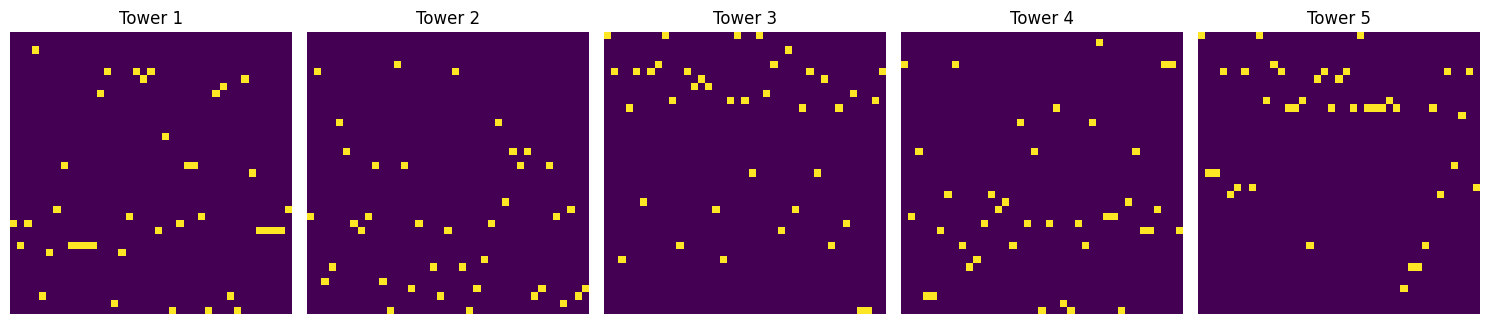

In [68]:
import matplotlib.pyplot as plt

example_tensor = adj_matrix_hop.detach()
num_plots = example_tensor.shape[0]

fig, axes = plt.subplots(1, num_plots, figsize=(15, 5))

for i in range(num_plots):
    axes[i].imshow(example_tensor[i], cmap='viridis')
    axes[i].set_title(f"Tower {i+1}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [24]:
example_tensor


tensor([[[-5.7230e-07, -4.7782e-08, -2.5237e-08,  ..., -1.2591e-07,
          -6.6900e-07, -2.7963e-14],
         [-1.7914e-08, -2.0942e-07, -2.5062e-10,  ..., -5.9181e-08,
          -4.4946e-10, -1.4361e-06],
         [-2.8053e-09, -2.7462e-11, -9.9812e-08,  ..., -4.2660e-08,
          -5.9683e-08, -6.9466e-08],
         ...,
         [-6.8818e-08, -5.5591e-09, -5.9755e-07,  ..., -1.9333e-07,
          -2.3007e-07, -7.9652e-11],
         [-6.5345e-08, -2.0066e-07, -1.0359e-08,  ..., -1.9816e-09,
          -6.2150e-08, -2.5692e-14],
         [-4.6454e-07, -6.5334e-08, -3.0449e-07,  ..., -1.5770e-08,
          -5.4585e-08, -9.9334e-08]],

        [[-2.8090e-07, -8.4637e-08, -1.1039e-09,  ..., -1.3683e-09,
          -3.9632e-08, -9.5856e-10],
         [-9.3801e-08, -4.0018e-08, -1.2715e-07,  ..., -5.7071e-08,
          -1.1933e-09, -9.5273e-08],
         [-3.5014e-10, -4.1782e-09, -1.2196e-07,  ..., -2.2125e-07,
          -2.8519e-08, -1.0914e-13],
         ...,
         [-6.2948e-09, -1